In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv('multinode_results_WEAK2025-09-02_140208.csv')
df

,nodes,x,y,time,wall_time
0,16,160000,10000,21.91,21.924446
1,8,80000,10000,21.54,21.552334
2,4,40000,10000,22.68,22.689893
3,2,20000,10000,21.01,21.026961
4,1,10000,10000,25.36,25.371416


In [18]:
baseline_wall_time = df.loc[df['nodes'] == 1, 'wall_time'].values[0]
baseline_wall_time

np.float64(25.371416018)

In [19]:
df['efficiency'] = baseline_wall_time / df['wall_time']

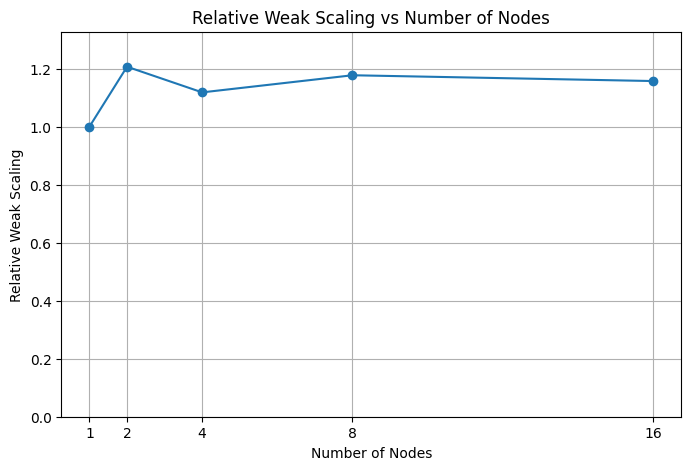

In [20]:
plt.figure(figsize=(8,5))
plt.plot(df['nodes'], df['efficiency'], marker='o', linestyle='-')
plt.xlabel('Number of Nodes')
plt.ylabel('Relative Weak Scaling')
plt.title('Relative Weak Scaling vs Number of Nodes')
plt.grid(True)
plt.xticks(df['nodes'])
plt.ylim(0, max(df['efficiency'])*1.1)
plt.show()

In [21]:
df=pd.read_csv('multinode_results_STRONG2025-09-02_140208.csv')
df

,nodes,x,y,time,wall_time
0,16,10000,10000,4.77,4.781131
1,8,10000,10000,6.13,6.142554
2,4,10000,10000,10.61,10.621253
3,2,10000,10000,13.58,13.595017
4,1,10000,10000,23.17,23.187847


In [22]:
baseline_wall_time = df.loc[df['nodes'] == 1, 'wall_time'].values[0]
baseline_wall_time

np.float64(23.187846902)

In [23]:
df['speedup'] = baseline_wall_time / df['wall_time']
df['efficiency'] = df['speedup'] / df['nodes']

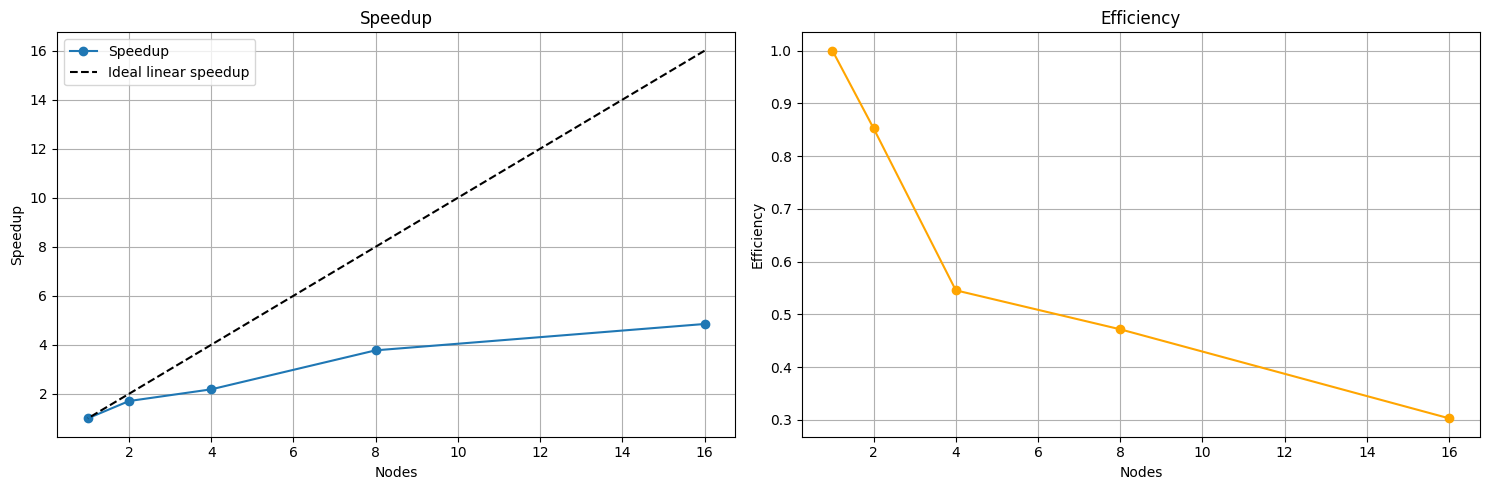

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df['nodes'], df['speedup'], marker='o', label='Speedup')
axs[0].plot(df['nodes'], df['nodes'], 'k--', label='Ideal linear speedup')
axs[0].set_xlabel('Nodes')
axs[0].set_ylabel('Speedup')
axs[0].set_title('Speedup')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(df['nodes'], df['efficiency'], marker='o', color='orange', label='Efficiency')
axs[1].set_xlabel('Nodes')
axs[1].set_ylabel('Efficiency')
axs[1].set_title('Efficiency')
axs[1].grid(True)

plt.tight_layout()
plt.show()